In [1]:
from os import listdir, name

from os.path import isfile, join
import json
from collections import Counter
import dill as pickle

In [2]:
paperFields = ['title', 'abstract', 'year', 'citationCount', 'influentialCitationCount', 'fieldsOfStudy' , 'authors']
authorFields = ['name']

paper_vertices = {}
author_vertices = {}
author_paper_edges = {}
missingData = 0
mypath = "data/semantic_scholar_data"       
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
document_counter = 0
for file in onlyfiles:
    if "colon+cancer" in file:
        with open(mypath + "/"+ file, 'r', encoding='utf-8') as f:
            json_file = json.load(f)
        label = file.split("_")[0]
        for entry in json_file["data"]:
            if entry['paperId'] not in paper_vertices.keys():
                paper_vertices[entry['paperId']] = {}
                for paperField in paperFields:
                    if entry[paperField] != None:
                        if paperField != 'authors':
                             paper_vertices[entry['paperId']][paperField] =  entry[paperField]
                        else:
                            for author in entry[paperField]:
                                if author['authorId'] not in author_vertices.keys():
                                    author_vertices[author['authorId']] = {}
                                    author_paper_edges[tuple([author['authorId'], entry['paperId']])] = {}
                                    for authorField in authorFields:
                                        author_vertices[author['authorId']][authorField] = author[authorField]
                                else:
                                    author_paper_edges[tuple([author['authorId'], entry['paperId']])] = {}
                    else:
                        missingData += 1            
        





        

    
        

In [3]:
with open("colon_cancer_knowledge_base/paper_vertices.pkl", "wb") as f:
    pickle.dump(paper_vertices, f)

with open("colon_cancer_knowledge_base/author_vertices.pkl", "wb") as f:
    pickle.dump(author_vertices, f)

with open("colon_cancer_knowledge_base/author_paper_edges.pkl", "wb") as f:
    pickle.dump(author_paper_edges, f)

    

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from rich import print
import nltk
import numpy as np
from nltk.tokenize import regexp_tokenize

In [5]:
def to_lower_case( str_):
        return str_.lower()

def remove_fullstops( str_):
    sentences = nltk.sent_tokenize(str_)
    sentences_without_fullstops = []
    for sentence in sentences:
        if sentence.endswith("."):
            sentences_without_fullstops.append(sentence[:-1])
        else: 
            sentences_without_fullstops.append(sentence)

    return " ".join(sentences_without_fullstops)
    
def remove_punctuation( str_):
        symbols = "!\"#&()*+/:;<=>?@[\]^_`{|},~\n"
        for symbol in symbols:
            str_ = np.char.replace(str_, symbol, "")

        return str(str_)

In [6]:
abtract_corpus = []
title_corpus = []

for vertexId, vertexAtts in paper_vertices.items():
    try: 
        abtract_corpus.append(remove_punctuation(remove_fullstops(to_lower_case(vertexAtts['abstract']))))
        title_corpus.append(remove_punctuation(remove_fullstops(to_lower_case(vertexAtts['title']))))
    except Exception as e:
        print(e)

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

In [7]:
abstract_tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\w[\w\-\%]*[\w\-\%]", stop_words=text.ENGLISH_STOP_WORDS)
abstract_tfidf_vectorizer.fit(abtract_corpus)
title_tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\w[\w\-\%]*[\w\-\%]", stop_words=text.ENGLISH_STOP_WORDS)
title_tfidf_vectorizer.fit(title_corpus)

TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                token_pattern='(?u)\\w[\\w\\-\\%]*[\\w\\-\\%]')

In [6]:
import pandas as pd
import website_parser
import json
import trafilatura
df = pd.read_csv("colon_cancer_news_articles/article_urls.csv", header = 0)
par = website_parser.WebsiteParser(df.url[15])
pay = par.get_payload()
pay_json = json.loads(pay)

In [11]:
website = trafilatura.fetch_url('https://www.verywellhealth.com/ulcerative-colitis-and-colon-cancer-5204560')

In [12]:
import re

In [15]:
print(website)

<!DOCTYPE html>
<html id="structuredTemplate_1-0" class="comp no-js taxlevel-4 vertical-verywellhealth attribution-enabled structuredTemplate html mntl-html" data-ab="60,99,53,99,63,70,99,99,99,99" data-resource-version="4.271.0" lang="en" data-mantle-resource-version="3.13.49" data-health-resource-version="4.271.0" data-tracking-container="true">				
<!--
<globe-environment environment="k8s-prod" application="health" dataCenter="us-east-1"/>
-->
<head class="loc head">				
					
					<script type="text/javascript">var Mntl = window.Mntl || {};var OneTrustTCFStub=function(e){"use strict";var t=function(){var s=this;this.intializeIabStub=function(){var e=window;window.__tcfapi=s.executeTcfApi,s.addIabFrame(),e.receiveOTMessage=s.receiveIabMessage,(e.attachEvent||window.addEventListener)("message",e.receiveOTMessage,!1)},this.addIabFrame=function(){var e=window,t="__tcfapiLocator";e.frames[t]||(e.document.body?s.addLocator(t,"TCF"):setTimeout(s.addIabFrame,5))},this.addLocator=function(e

In [8]:
for link in pay_json["external_links"]:
    try: 
        downloaded = trafilatura.fetch_url(link)
        metadata = trafilatura.extract_metadata(downloaded)
        print(metadata)
        #par2 = website_parser.WebsiteParser(link, soft_404 =False)
        #pay_ = par2.get_payload()
        #pay_json_ = json.loads(pay_)
    except Exception as e:
        print(e)
    


{'title': None, 'author': None, 'url': None, 'hostname': None, 'description': None, 'sitename': None, 'date': '2022-02-03', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


C:\Users\Colmj\anaconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


{'title': 'Digital Camera Magazine Subscription', 'author': None, 'url': 'https://www.magazinesdirect.com/digital-camera-magazine-subscription', 'hostname': 'magazinesdirect.com', 'description': None, 'sitename': 'magazinesdirect.com', 'date': '1999-02-12', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}
{'title': 'PhotoPlus Magazine Subscription', 'author': None, 'url': 'https://www.magazinesdirect.com/photoplus-magazine-subscription', 'hostname': 'magazinesdirect.com', 'description': None, 'sitename': 'magazinesdirect.com', 'date': '2022-02-01', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}
{'title': 'N-Photo Magazine Subscription', 'author': None, 'url': 'https://www.magazinesdirect.com/nphoto-magazine-subscription', 'hostname': 'magazinesdirect.com', 'description': None, 'sitename': 'magazinesdirect.com', 'date': '2022-01-01', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}
{'title': '

ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None


ERROR:root:pycurl: https://www.awin1.com/awclick.php?awinmid=2961&awinaffid=103504&clickref=dcw-us-3757008318790974500&p=http%3A%2F%2Fwww.magazinesdirect.com%2Fdigitalcameraworld (47, 'Maximum (2) redirects followed')
ERROR:trafilatura.utils:this type cannot be processed: <class 'NoneType'>


None
{'title': 'Connectors, Creators, Experience Makers - Future plc', 'author': None, 'url': None, 'hostname': None, 'description': "We are Future, the global platform for specialist media, home to some of the world's most popular brands.", 'sitename': 'Future PLC', 'date': '2021-08-03', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}
{'title': 'Terms and Conditions - Future plc', 'author': None, 'url': None, 'hostname': None, 'description': None, 'sitename': 'Future PLC', 'date': '2021-11-17', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}
{'title': 'Privacy Policy - Future plc', 'author': None, 'url': None, 'hostname': None, 'description': None, 'sitename': 'Future PLC', 'date': '2021-11-17', 'categories': [], 'tags': [], 'fingerprint': None, 'id': None, 'license': None}
{'title': 'Cookie Policy - Future plc', 'author': None, 'url': None, 'hostname': None, 'description': None, 'sitename': 'Future PLC', 'date': '2021-11

In [17]:
rank_words(" ".join(list(pay_json["sentence_map"].values())), abstract_tfidf_vectorizer, print_string=True)

01 5Early diagnosis is essential completely emptied bowel is considered to be healthy bowel 
With keeping waste out of the body the bowel serves major role in the smooth functioning of 
an individual and as is inevitable an unhealthy bowel movement can lead to several 
complications What is noteworthy is that the bowel movement of human body is quite sensitive 
to the type of food that one consumes the type of environment in which one lives and the 
intake of water So very often we tend to disturb the bowel movement and learn to live with it
Cancer in bowel or the colorectal portion of the body which comprises the colon or the rectum
is one of the common cancers in human beings In this case there is abnormal growth of cells 
or polyps in the colon area 02 5Colon cancer or hemmorhoids It is often confused with 
hemorrhoids Hemorrhoids and colon cancer are the two most commonly occuring complications 
which are directly associated with bowel movement Occurence of these complications affect the
bowel movement and overall health of the bowel to large extent It is very crucial to 
understand the symptoms associated with both these complications Hemorrhoids are swollen and 
enlarged veins in the lower part of rectum and anus There are three types of hemorrhoids 
internal external and thrombosed Worldwide colon cancer is the third most common cancer among
men and second most common cancer in women and in India it is among the top commonly 
occurring cancers 03 5Colon cancer and hemorrhoids have similar symptoms Any disturbance in 
the normal functioning of the body disturbs the bowel movement While there are many other 
medical conditions that would give you the feeling of not having emptied the bowel properly 
this is also major indication of the presence of hemorrhoids or the development of colon 
cancer In both hemorrhoids and colon cancer there is rectal bleeding blood in the stool and 
the feeling of not having emptied the bowel 04 5Colon cancer symptoms which are different 
from hemorrhoids Though unfortunately cancer is detectable only after certain progression in 
the disease there are certain symptoms which are very specific to colon cancer These symptoms
are change in the frequency of bowel movement pain due to bowel obstruction sudden nausea 
sudden vomiting drop in weight narrow or ribbon like stool pain in the rectum area Rectal 
bleeding can be compared to differentiate colon cancer from hemorrhoids If the blood is red 
it is most likely that it is hemorrhoid dark blood is an indication that the bleeding is from
within the body Abdominal pain is major symptom of colon cancer Hemorrhoids do not cause pain
in the abdomen Fatigue is also common sign of cancer Bleeding in the intestinal tract will 
cause loss of blood and anemia which will subsequently lead to weakness 05 5Is there any risk
of colon cancer in patients with hemorrhoids Though many researchers say that hemorrhoids do 
not lead to cancer many other research studies have linked hemorrhoids with colon cancer 
People with hemorrhoids should undergo colonoscopy regularly for early detection of the 
cancer closecomments SIGN IN WITH FacebookGoogleEmail 

({'5Colon',
  '5Early',
  '5Is',
  'Abdominal',
  'Any',
  'Bleeding',
  'Cancer',
  'FacebookGoogleEmail',
  'Fatigue',
  'Hemorrhoids',
  'IN',
  'If',
  'In',
  'India',
  'It',
  'Occurence',
  'People',
  'Rectal',
  'SIGN',
  'So',
  'There',
  'These',
  'Though',
  'WITH',
  'What',
  'While',
  'With',
  'Worldwide',
  'after',
  'also',
  'among',
  'an',
  'and',
  'any',
  'are',
  'as',
  'be',
  'both',
  'can',
  'cells',
  'closecomments',
  'colorectal',
  'compared',
  'development',
  'different',
  'disease',
  'disturbs',
  'do',
  'due',
  'emptied',
  'for',
  'from',
  'give',
  'growth',
  'have',
  'hemmorhoids',
  'hemorrhoid',
  'in',
  'is',
  'it',
  'many',
  'most',
  'normal',
  'not',
  'occuring',
  'of',
  'often',
  'one',
  'only',
  'or',
  'other',
  'out',
  'overall',
  'part',
  'patients',
  'progression',
  'ribbon',
  'risk',
  'role',
  'say',
  'several',
  'should',
  'specific',
  'studies',
  'sudden',
  'swollen',
  'that',
  'the',
 

In [12]:
def rank_words(doc, tfidf, print_string = False):
    colors = ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']
    per9, per19, per29, per39, per49, per59, per69, per79, per89, per99 = set(), set(), set(), set(),set(), set(),set(), set(),set(), set()
    array = tfidf.transform([doc])
    tf_idf_dict = dict(array.todok())
    keys_to_word = {tfidf.get_feature_names()[k[1]] :  v for k,v in tf_idf_dict.items()}
    string_to_print = ""
    percentiles = np.percentile(np.array(list(keys_to_word.values())), [10,20,30,40,50,60,70,80,90])
    tokens = regexp_tokenize(doc, r"(?u)\w[\w\-\%]*[\w\-\%]")
    for token in tokens:
        try:
            score = keys_to_word[token]
        except:
            score = 0
        if score < percentiles[0]:
            string_to_print += "[{}]{} ".format(colors[0],token)
            per9.add(token)
        elif score >= percentiles[0] and score < percentiles[1]:
            string_to_print += "[{}]{} ".format(colors[1],token)
            per19.add(token)
        elif score >= percentiles[1] and score < percentiles[2]:
            string_to_print += "[{}]{} ".format(colors[2],token)
            per29.add(token)
        elif score >= percentiles[2] and score < percentiles[3]:
            string_to_print += "[{}]{} ".format(colors[3],token)
            per39.add(token)
        elif score >= percentiles[3] and score < percentiles[4]:
            string_to_print += "[{}]{} ".format(colors[4],token)
            per49.add(token)
        elif score >= percentiles[4] and score < percentiles[5]:
            string_to_print += "[{}]{} ".format(colors[5],token)
            per59.add(token)
        elif score >= percentiles[5] and score < percentiles[6]:
            string_to_print += "[{}]{} ".format(colors[6],token)
            per69.add(token)
        elif score >= percentiles[6] and score < percentiles[7]:
            string_to_print += "[{}]{} ".format(colors[7],token)
            per79.add(token)
        elif score >= percentiles[7] and score < percentiles[8]:
            string_to_print += "[{}]{} ".format(colors[8],token)
            per89.add(token)
        else:
            string_to_print += "[{}]{} ".format(colors[9],token)
            per99.add(token)
    if print_string:
        print(string_to_print)
    return per9, per19, per29, per39, per49, per59, per69, per79, per89, per99



In [9]:
abstract_keyword_vertices = {}
abstract_keyword_edges = {}

In [10]:
for vertexId, vertexAtts in paper_vertices.items():
    try: 
        per9, per19, per29, per39, per49, per59, per69, per79, per89, per99 = rank_words(remove_punctuation(remove_fullstops(to_lower_case(vertexAtts['abstract']))), abstract_tfidf_vectorizer)
        for p in per9:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.05: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.05] += 1
        
        for p in per19:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.15: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.15] += 1

        for p in per29:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.25: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.25] += 1

        for p in per39:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.35: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.35] += 1
        
        for p in per49:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.45: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.45] += 1

        for p in per59:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.55: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.55] += 1
        
        for p in per69:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.65: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.65] += 1
        
        for p in per79:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.75: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.75] += 1
        
        for p in per89:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.85: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.85] += 1

        for p in per99:
            if p not in abstract_keyword_vertices.keys():
                abstract_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in abstract_keyword_edges.keys():
                abstract_keyword_edges[tuple([p, vertexId])] = {0.95: 1}
            else:
                abstract_keyword_edges[tuple([p, vertexId])][0.95] += 1

        #per9, per19, per29, per39, per49, per59, per69, per79, per89, per99 = title_corpus.append(remove_punctuation(remove_fullstops(to_lower_case(vertexAtts['title']))), title_tfidf_vectorizer )
    except Exception as e:
        print(e)

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

'abstract'

In [12]:
from collections import Counter
import numpy as np
from more_itertools import windowed
def phrase_candidate_indentification(doc_pro, doc_og, tfidf):
    array = tfidf.transform([doc_pro])
    tf_idf_dict = dict(array.todok())
    keys_to_word = {tfidf.get_feature_names()[k[1]] :  v for k,v in tf_idf_dict.items()}
    percentiles = np.percentile(np.array(list(keys_to_word.values())), [10,20,30,40,50,60,70,80,90])
    #print(percentiles)
   
    sentences =  nltk.tokenize.sent_tokenize(doc_og)

    phrase_candidates = Counter()

    for sent in sentences:
        sub_sentences = sent.split(",")
        for sub_sent in sub_sentences:
            tokens = regexp_tokenize(sub_sent, r"(?u)\w[\w\-\%]*[\w\-\%]")
            #print(tokens)
            if len(tokens) > 1:
                if len(tokens) >= 3:
                    N = 4
                else:
                    N = 3
                for n in range(2, N):
                    for token_window in windowed(tokens, n):
                        #print(token_window)
                        percentiles_in_mwe = []
                        
                        for token in token_window:
                            percentile_found = False 

                            try:
                                if keys_to_word[remove_punctuation(remove_fullstops(to_lower_case(token)))] < percentiles[0]:
                                    percentiles_in_mwe.append(0)
                                    percentile_found = True
                                
                                elif keys_to_word[remove_punctuation(remove_fullstops(to_lower_case(token)))] >= percentiles[-1]:
                                    percentiles_in_mwe.append(len(percentiles))
                                    percentile_found = True
                            except KeyError:
                                percentiles_in_mwe.append(0)
                                percentile_found = True
                                
                            if not percentile_found:
                                counter = 1
                                for lL, uL in windowed(percentiles, 2):
                                    if keys_to_word[remove_punctuation(remove_fullstops(to_lower_case(token)))] >= lL and keys_to_word[remove_punctuation(remove_fullstops(to_lower_case(token)))] < uL:
                                        percentiles_in_mwe.append(counter)
                                        break
                                    elif counter == 0 and keys_to_word[remove_punctuation(remove_fullstops(to_lower_case(token)))] < lL:
                                        percentiles_in_mwe.append(counter)
                                        break
                                    counter += 1
                                    
                        
                        #print(percentiles_in_mwe)
                        phrase_candidates[token_window] += np.mean(percentiles_in_mwe) 
                #print("-----------------------------------------------------------------------------")
    

    limit = np.percentile(list(phrase_candidates.values()), 95)
    top_candidates = {}
    for k,v in phrase_candidates.items():
        if v >= limit:
            top_candidates[k] = v

    
    return  top_candidates
         

In [13]:
import time

In [15]:
from IPython.display import clear_output

In [16]:
top_candidates_from_papers = {}
failed_paper_counter = 0
counter = 0
total_papers = len(paper_vertices)
runtimes = []
for k,v in paper_vertices.items():
    try:
        start_time = time.time()
        top_candidates_from_papers[k]= phrase_candidate_indentification(remove_punctuation(remove_fullstops(to_lower_case(v['abstract']))), v['abstract'],abstract_tfidf_vectorizer)
        end_time = time.time()
        runtimes.append(end_time - start_time)
        counter += 1 
        clear_output(wait=True)
        print((np.mean(runtimes) * (total_papers - counter))  / (60*60))

    except:
        failed_paper_counter += 1
    

    
  

0.04673816184361855

[(('colon', 'cancer'), 62705.5),
 (('colorectal', 'cancer'), 19795.0),
 (('cancer', 'cells'), 17855.5),
 (('95%', 'CI'), 17540.5),
 (('cell', 'lines'), 10742.0),
 (('colon', 'cancer', 'cells'), 9068.999999999998),
 (('rectal', 'cancer'), 8980.5),
 (('patients', 'with'), 8302.0),
 (('cancer', 'cell'), 6864.0),
 (('cancer', 'risk'), 6253.5),
 (('risk', 'of'), 6020.5),
 (('cancer', 'patients'), 5271.5),
 (('human', 'colon'), 4920.0),
 (('of', 'colon', 'cancer'), 4853.0),
 (('breast', 'cancer'), 4093.5),
 (('in', 'colon', 'cancer'), 3950.3333333333344),
 (('physical', 'activity'), 3788.5),
 (('associated', 'with'), 3723.5),
 (('stage', 'II'), 3667.0),
 (('of', 'colon'), 3606.0),
 (('cancer', 'cell', 'lines'), 3572.9999999999986),
 (('expression', 'of'), 3508.0),
 (('stage', 'III'), 3374.5),
 (('colon', 'cancer', 'cell'), 3166.6666666666656),
 (('in', 'colon'), 3091.5),
 (('cell', 'proliferation'), 3002.0),
 (('adjuvant', 'chemotherapy'), 2783.5),
 (('colon', 'cancers'), 2777.5),
 (('human'

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

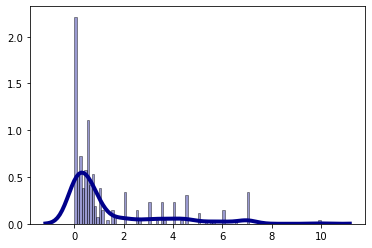

In [157]:
sns.distplot(list(test.values()), hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [93]:
title_keyword_vertices = {}
title_keyword_edges = {}

In [94]:
for vertexId, vertexAtts in paper_vertices.items():
    try: 
        per9, per19, per29, per39, per49, per59, per69, per79, per89, per99 = rank_words(remove_punctuation(remove_fullstops(to_lower_case(vertexAtts['title']))), title_tfidf_vectorizer)
        for p in per9:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.05: 1}
            else:
                if 0.05 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.05] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.05] += 1
        
        for p in per19:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.15: 1}
            else:
                if 0.15 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.15] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.15] += 1

        for p in per29:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.25: 1}
            else:
                if 0.25 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.25] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.25] += 1

        for p in per39:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.35: 1}
            else:
                if 0.35 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.35] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.35] += 1
        
        for p in per49:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.45: 1}
            else:
                if 0.45 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.45] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.45] += 1

        for p in per59:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.55: 1}
            else:
                if 0.55 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.55] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.55] += 1
        
        for p in per69:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.65: 1}
            else:
                if 0.65 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.65] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.65] += 1
        
        for p in per79:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.75: 1}
            else:
                if 0.75 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.75] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.75] += 1
        
        for p in per89:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId]) not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.85: 1}
            else:
                if 0.85 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.85] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.85] += 1

        for p in per99:
            if p not in title_keyword_vertices.keys():
                title_keyword_vertices[p] = {}
            if tuple([p, vertexId])  not in title_keyword_edges.keys():
                title_keyword_edges[tuple([p, vertexId])] = {0.95: 1}
            else:
                if 0.95 not in title_keyword_edges[tuple([p, vertexId])].keys():
                    title_keyword_edges[tuple([p, vertexId])][0.95] = 1
                else:
                    title_keyword_edges[tuple([p, vertexId])][0.95] += 1

        
    except Exception as e:
        print(e)

In [21]:
import random

In [11]:
import dill as pickle

with open("colon_cancer_knowledge_base/abstract_keyword_vertices.pkl", "wb") as f:
    pickle.dump(abstract_keyword_vertices, f)

with open("colon_cancer_knowledge_base/abstract_keyword_edges.pkl", "wb") as f:
    pickle.dump(abstract_keyword_edges, f)


In [9]:
with open("colon_cancer_knowledge_base/title_keyword_vertices.pkl", "wb") as f:
    pickle.dump(title_keyword_vertices, f)

with open("colon_cancer_knowledge_base/title_keyword_edges.pkl", "wb") as f:
    pickle.dump(title_keyword_edges, f)

NameError: name 'title_keyword_vertices' is not defined

In [ ]:
authors = []
keyword = random.choice(list(title_keyword_vertices.keys()))
print(keyword)
for k,v, in title_keyword_edges.items():
    if k[0] == keyword:
        print(k,v)
        for key, value in author_paper_edges.items():
            if k[1] == key[1]:
                print(key,value)
                authors.append(key[0])   

In [8]:
 import dill as pickle

with open("colon_cancer_knowledge_base/abstract_keyword_vertices.pkl", "rb") as f:
    abstract_keyword_vertices = pickle.load(f)

with open("colon_cancer_knowledge_base/abstract_keyword_edges.pkl", "rb") as f:
    abstract_keyword_edges =  pickle.dump(f)

EOFError: Ran out of input

100549

In [97]:
abstract_keyword_edges

{('gene', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('suggest', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('and', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('with', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('have', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('colon', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('role', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('high', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('an', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('important', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('analysis', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('be', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('the', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('these', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 ('were', '56321e765211d85a29621551d0df9a1cfc0a78ca'): {0.05: 1},
 (

In [12]:
import dill as pickle
import numpy as np
import nltk
from collections import Counter
import random

In [13]:
with open("colon_cancer_knowledge_base/paper_vertices.pkl", "rb") as f:
    paper_vertices = pickle.load(f)
with open("colon_cancer_knowledge_base/author_vertices.pkl", "rb") as f:
    author_vertices = pickle.load(f)
with open("colon_cancer_knowledge_base/author_paper_edges.pkl", "rb") as f:
    author_paper_edges = pickle.load(f)
with open("colon_cancer_knowledge_base/abstract_keyword_vertices.pkl", "rb") as f:
    abstract_keyword_vertices = pickle.load(f)
with open("colon_cancer_knowledge_base/abstract_keyword_edges.pkl", "rb") as f:
    abstract_keyword_edges = pickle.load(f)



In [14]:
papers = list(paper_vertices.keys())
authors = list(author_vertices.keys())
keywords = list(abstract_keyword_vertices.keys())

In [15]:
weights = []
for i in range(len(papers)):
    temp = []
    for j in range(len(authors)):
        if (authors[j], papers[i]) in author_paper_edges.keys():
            temp.append(1)
        else:
            temp.append(0)   
    weights.append(temp)
        

In [16]:
pa_weights = np.array(weights)

In [17]:
pa_weights.shape

(8041, 36123)

In [18]:
weights = []
for i in range(len(keywords)):
    temp = []
    for j in range(len(papers)):
        if (keywords[i], papers[j]) in abstract_keyword_edges.keys():
            temp.append(list(abstract_keyword_edges[(keywords[i], papers[j])].keys())[0])
        else:
            temp.append(0)
    weights.append(temp)
    
        

In [20]:
kp_weights = np.array(weights)
kp_weights.shape

(51186, 8041)

In [23]:

import pandas as pd
import website_parser
import json
df = pd.read_csv("colon_cancer_news_articles/article_urls.csv", header = 0)

In [32]:
par = website_parser.WebsiteParser(df.url[1])
pay = par.get_payload()
pay_json = json.loads(pay)

In [33]:
input_paper = " ".join(list(pay_json['sentence_map'].values()))

In [34]:
#input_paper = paper_vertices[random.choice(papers)]
#processed_abstract = remove_punctuation(remove_fullstops(to_lower_case(input_paper['abstract'])))
processed_abstract = remove_punctuation(remove_fullstops(to_lower_case(input_paper)))
tokens = nltk.tokenize.regexp_tokenize(processed_abstract, r"(?u)\b\w[\w-]*\w\b")
articleKeywordCounter = Counter()
for token in tokens:
    articleKeywordCounter[token] += 1

input_weights = []
for i in range(len(keywords)):
    if keywords[i] in articleKeywordCounter.keys():
        input_weights.append(articleKeywordCounter[keywords[i]])
    else:
        input_weights.append(0)
    
input_vector = np.array(input_weights)

h1 = np.dot(input_vector,kp_weights)


print(input_paper)
print(paper_vertices[papers[np.argmax(h1)]])

y = np.dot(h1,pa_weights)

print(authors[np.argmax(y)])

01/5Early diagnosis is essential A completely emptied bowel is considered to be a healthy 
bowel. With keeping waste out of the body the bowel serves a major role in the smooth 
functioning of an individual and as is inevitable an unhealthy bowel movement can lead to 
several complications. What is noteworthy is that the bowel movement of a human body is quite
sensitive to the type of food that one consumes, the type of environment in which one lives 
and the intake of water. So very often, we tend to disturb the bowel movement and learn to 
live with it. Cancer in bowel or the colorectal portion of the body which comprises the colon
or the rectum is one of the common cancers in human beings. In this case there is abnormal 
growth of cells or polyps in the colon area. 02/5Colon cancer or hemmorhoids? It is often 
confused with hemorrhoids. Hemorrhoids and colon cancer are the two most commonly occuring 
complications which are directly associated with bowel movement. Occurence of these 
complications affect the bowel movement and overall health of the bowel to a large extent. It
is very crucial to understand the symptoms associated with both these complications. 
Hemorrhoids are swollen and enlarged veins in the lower part of rectum and anus. There are 
three types of hemorrhoids: internal, external and thrombosed. Worldwide colon cancer is the 
third most common cancer among men and second most common cancer in women and in India it is 
among the top 5 commonly occurring cancers. 03/5Colon cancer and hemorrhoids have similar 
symptoms Any disturbance in the normal functioning of the body disturbs the bowel movement. 
While there are many other medical conditions that would give you the feeling of not having 
emptied the bowel properly, this is also a major indication of the presence of hemorrhoids or
the development of colon cancer. In both hemorrhoids and colon cancer there is rectal 
bleeding, blood in the stool and the feeling of not having emptied the bowel. 04/5Colon 
cancer symptoms which are different from hemorrhoids Though unfortunately cancer is 
detectable only after certain progression in the disease, there are certain symptoms which 
are very specific to colon cancer. These symptoms are: change in the frequency of bowel 
movement, pain due to bowel obstruction, sudden nausea, sudden vomiting, drop in weight, 
narrow or ribbon like stool, pain in the rectum area. Rectal bleeding can be compared to 
differentiate colon cancer from hemorrhoids. If the blood is red it is most likely that it is
hemorrhoid; dark blood is an indication that the bleeding is from within the body. Abdominal 
pain is a major symptom of colon cancer. Hemorrhoids do not cause pain in the abdomen. 
Fatigue is also a common sign of cancer. Bleeding in the intestinal tract will cause loss of 
blood and anemia which will subsequently lead to weakness. 05/5Is there any risk of colon 
cancer in patients with hemorrhoids? Though many researchers say that hemorrhoids do not lead
to cancer, many other research studies have linked hemorrhoids with colon cancer. People with
hemorrhoids should undergo a colonoscopy regularly for early detection of the cancer. 
closecomments SIGN IN WITH FacebookGoogleEmail

{
    'title': 'Aspirin Use and the Risk for Colorectal Cancer and Adenoma in Male Health 
Professionals',
    'abstract': "The evidence that nonsteroidal anti-inflammatory drugs (NSAIDs), 
particularly aspirin, decrease the occurrence of colorectal cancer and possibly other 
gastrointestinal tumors in humans [1] is not entirely conclusive. Several case reports and 
small clinical trials show that sulindac causes regression of the polyps in patients with 
familial polyposis [2-7]. Patients with rheumatoid arthritis, regular users of NSAIDs, appear
to have a lower incidence of gastrointestinal tumors, primarily stomach and large-bowel 
cancers [8-10]. Case-control studies have shown an inverse relation between NSAID use and 
occurrence of colorectal cancer [11-13] and adenoma [14-16]; an inverse association between 
aspirin use and mortality from gastrointestinal cancers was observed in a large prospective 
study [17, 18]. A recent prospective study [19] showed an inverse association between aspirin
use and incidence of colon cancer, but another cohort study did not [20]. A randomized trial 
[21] showed no association between aspirin use and the risk for colorectal cancer, but the 
dosage may have been too low and the follow-up period too short. A protective influence of 
NSAIDs on colon cancer has been supported by studies in animals [22-24]. Because the question
is unresolved [25], we examined the relation between aspirin and other NSAID use and the risk
for colorectal adenoma and cancer incidence and mortality in a large U.S. cohort of male 
health professionals. Methods Study Population We analyzed data from an ongoing cohort of 
men, the Health Professionals Follow-up Study. This cohort was initiated in 1986 to study 
various potential causes of cardiovascular disease and cancer, particularly diet [26]. At 
baseline, 51 529 U.S. male dentists (58%), optometrists (7%), osteopaths (4%), podiatrists 
(3%), pharmacists (8%), and veterinarians (20%) who were 40 to 75 years of age responded to 
mailed questionnaires on aspirin and other NSAID use and on history of cancer and other 
clinically diagnosed medical conditions. In 1988, 1990, and 1992, we mailed a follow-up 
questionnaire to update exposure information and ascertain newly diagnosed medical conditions
[27]. Current use of aspirin and other NSAIDs was assessed at baseline and at follow-up using
a list that included the following categories: 1) aspirin, 2+ times per week (for example, 
Anacin, Bufferin, Alka-Seltzer); 2) acetaminophen, 2+ times per week (for example, Tylenol); 
and 3) other anti-inflammatory medications (for example, Motrin, Indocin, Naprosyn, Dolobid).
Advil was used as an example rather than Dolobid on the 1988 and 1990 questionnaires. Reasons
for use were not assessed at baseline. In 1993, however, a randomly selected sample of 211 
participants who reported aspirin use from 1986 to 1990 were mailed a brief supplementary 
questionnaire. Of the 211 men, 185 (88%) responded and reported one or more of the following 
reasons: cardiovascular disease, 25.4%; to decrease risk for cardiovascular disease, 58.4%; 
headaches, 25.4%; joint or musculoskeletal pain, 33.0%; and other reasons, 7.0%. From the 
supplementary questionnaire, we inferred that the median duration of use during the 1990 to 
1992 follow-up period was 9 years. At baseline, we also inquired about age, current and past 
smoking, weight and height, family history of colorectal cancer, leisure-time physical 
activity, and dietary and alcohol intake using a semiquantitative food frequency 
questionnaire [28, 29]. On the follow-up questionnaires, we included questions about the 
participant's history of colonoscopy or sigmoidoscopy before and during the study. We also 
assessed the indications for endoscopy (bleeding in stool, positive test result for occult 
fecal blood, abdominal pain, diarrhea or constipation, family history of colon cancer, 
routine screening [no symptoms], or follow-up). Iden

144786791